## DATA SETUP

In [1]:
from setup import data_setup, plot_setup
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.particles import rotated_dataset

In [2]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [3]:
ds, mw, stellar_model, imf, planet_model = data_setup(snapshot, resolution, sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-06 17:57:48,564 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-06 17:57:48,625 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-06 17:57:48,626 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-06 17:57:48,627 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-06 17:57:48,627 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-06 17:57:48,628 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-06 17:57:48,628 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-06 17:57:48,628 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-06 17:57:48,628 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-06 17:57:48,629 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [4]:
gas_proj_dict, particle_proj_dict = plot_setup(ds, mw)

## FIELDS

In [5]:
def _mass_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","Masses"]
ds.add_field(("stars", "mass_weighted_planets"), function=_mass_weighted_planets, sampling_type="local", units="1/Msun")

def _star_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","main_sequence_stars"]
ds.add_field(("stars", "star_weighted_planets"), function=_star_weighted_planets, sampling_type="local", units="")

## CREATE DATA SOURCE

In [20]:
data_source = mw.sphere(radius=(30,"kpc"))
angular_momentum_vector = data_source.quantities.angular_momentum_vector()

In [27]:
rotated_data = rotated_dataset(data_source, mw.centre(), angular_momentum_vector, 
                                                    [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets")])

yt : [INFO     ] 2023-06-06 18:11:17,143 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-06 18:11:17,144 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-06 18:11:17,145 Parameters: domain_left_edge          = [-54.72878641 -54.72878641 -54.72878641]
yt : [INFO     ] 2023-06-06 18:11:17,145 Parameters: domain_right_edge         = [54.59012637 54.59012637 54.59012637]
yt : [INFO     ] 2023-06-06 18:11:17,146 Parameters: cosmological_simulation   = 0


## HEAD-ON

yt : [INFO     ] 2023-06-06 18:20:27,834 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:20:27,835 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:20:27,835 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:20:27,835 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:20:27,837 Splatting (('io', 'planets')) onto a 800 by 800 mesh using method 'cic'



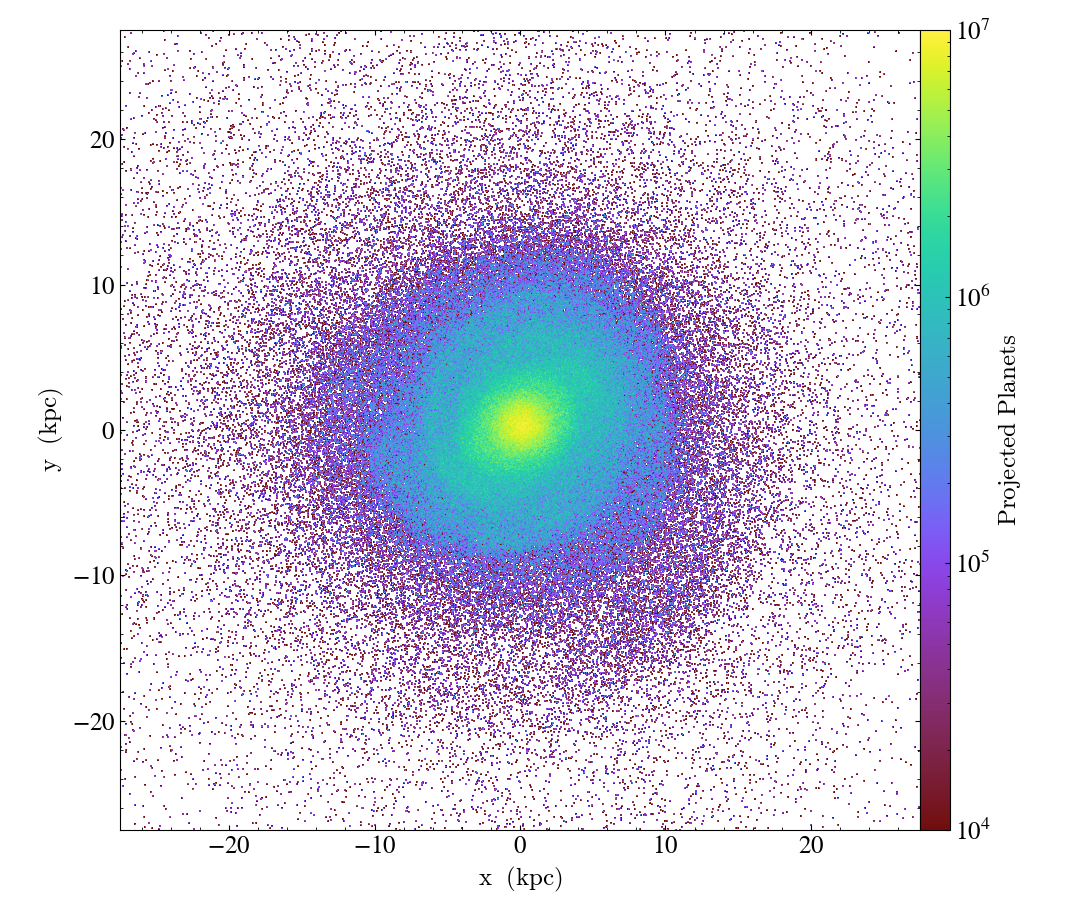

In [45]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("io", "planets")],
    axis='z',
    width=(55,"kpc"), 
    deposition="cic"
)

plot.set_zlim(("io", "planets"), zmin=(10000, ""), zmax=(1e7, ""))
plot.show()

yt : [INFO     ] 2023-06-06 18:23:50,868 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:23:50,869 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:23:50,869 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:23:50,870 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:23:50,871 Splatting (('io', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-06 18:23:51,062 Splatting (('io', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



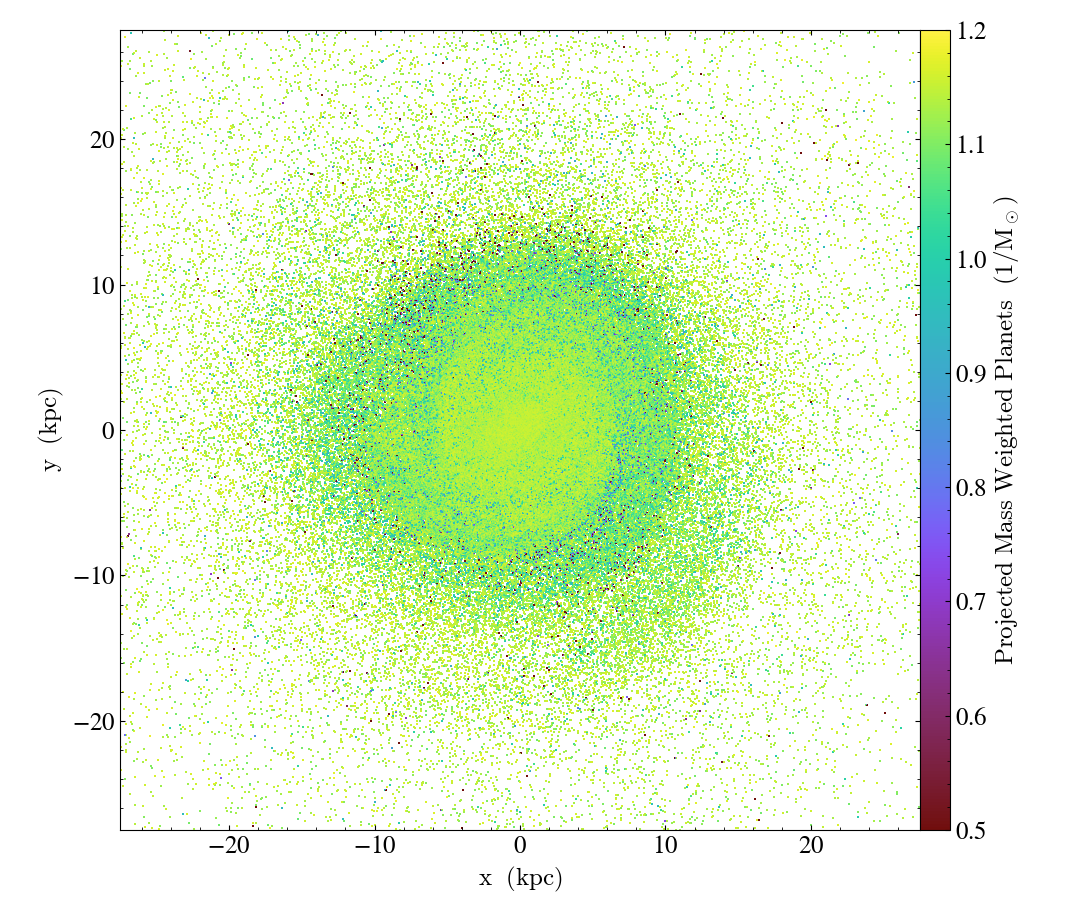
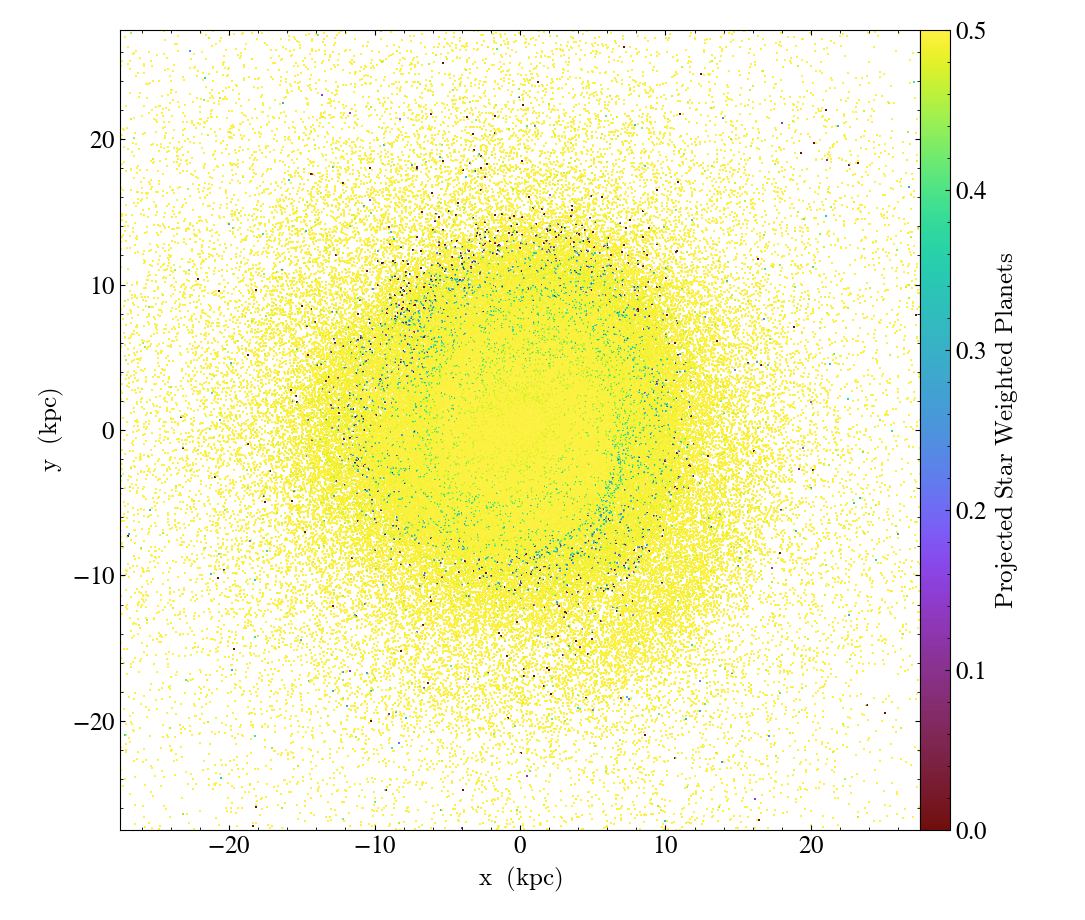

In [47]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("io", "mass_weighted_planets"), ("io", "star_weighted_planets")],
    axis='z',
    width=(55,"kpc"), 
    weight_field=("io","particle_ones"),
    deposition="cic"
)

plot.set_log(("io", "star_weighted_planets"), False)
plot.set_log(("io", "mass_weighted_planets"), False)

plot.set_zlim(("io", "star_weighted_planets"), zmin=(0.0, ""), zmax=(0.5, ""))
plot.set_zlim(("io", "mass_weighted_planets"), zmin=(0.5, "1/Msun"), zmax=(1.2, "1/Msun"))

plot.show()

## SIDE-ON

yt : [INFO     ] 2023-06-06 18:24:35,527 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:24:35,528 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:24:35,529 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:24:35,529 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:24:35,531 Splatting (('io', 'planets')) onto a 800 by 800 mesh using method 'cic'



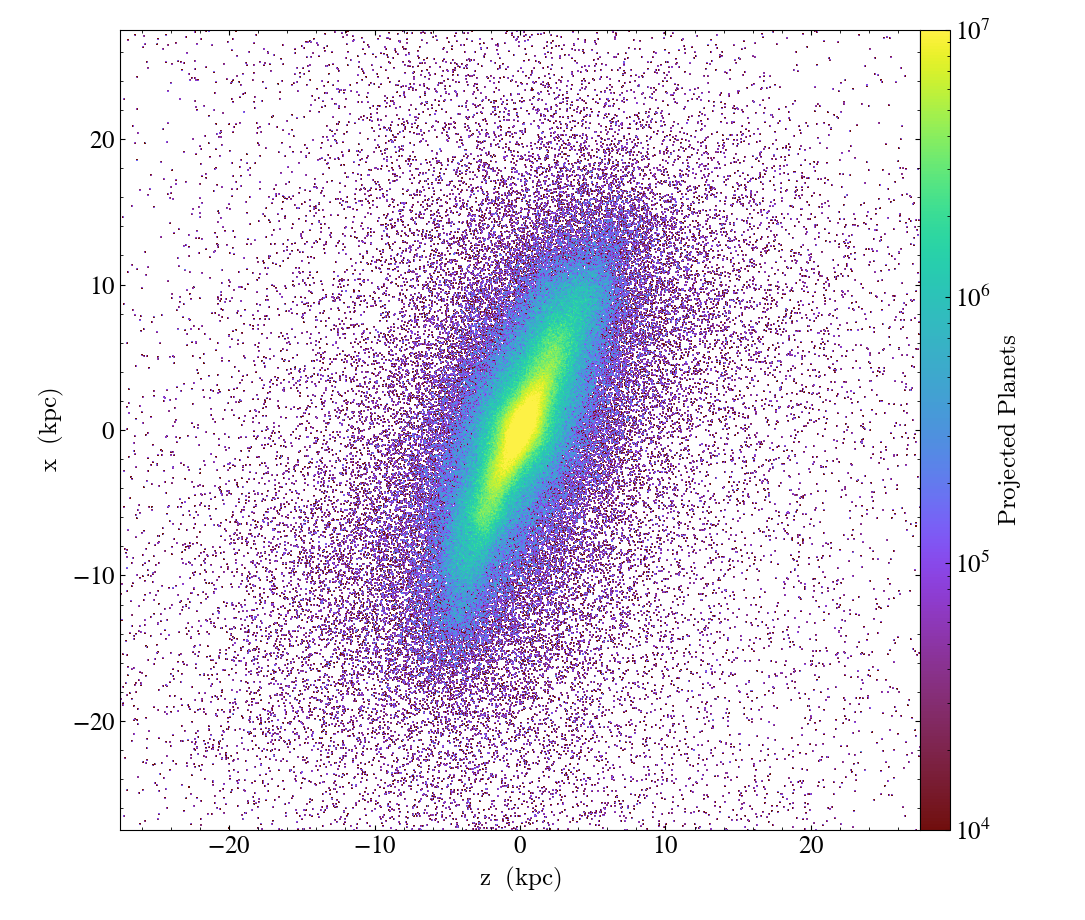

In [48]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("io", "planets")],
    axis='y',
    width=(55,"kpc"), 
    deposition="cic"
)

plot.set_zlim(("io", "planets"), zmin=(10000, ""), zmax=(1e7, ""))

plot.show()

yt : [INFO     ] 2023-06-06 18:25:52,527 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:25:52,528 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:25:52,528 xlim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:25:52,529 ylim = -27.569330 27.430670
yt : [INFO     ] 2023-06-06 18:25:52,531 Splatting (('io', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-06 18:25:52,743 Splatting (('io', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



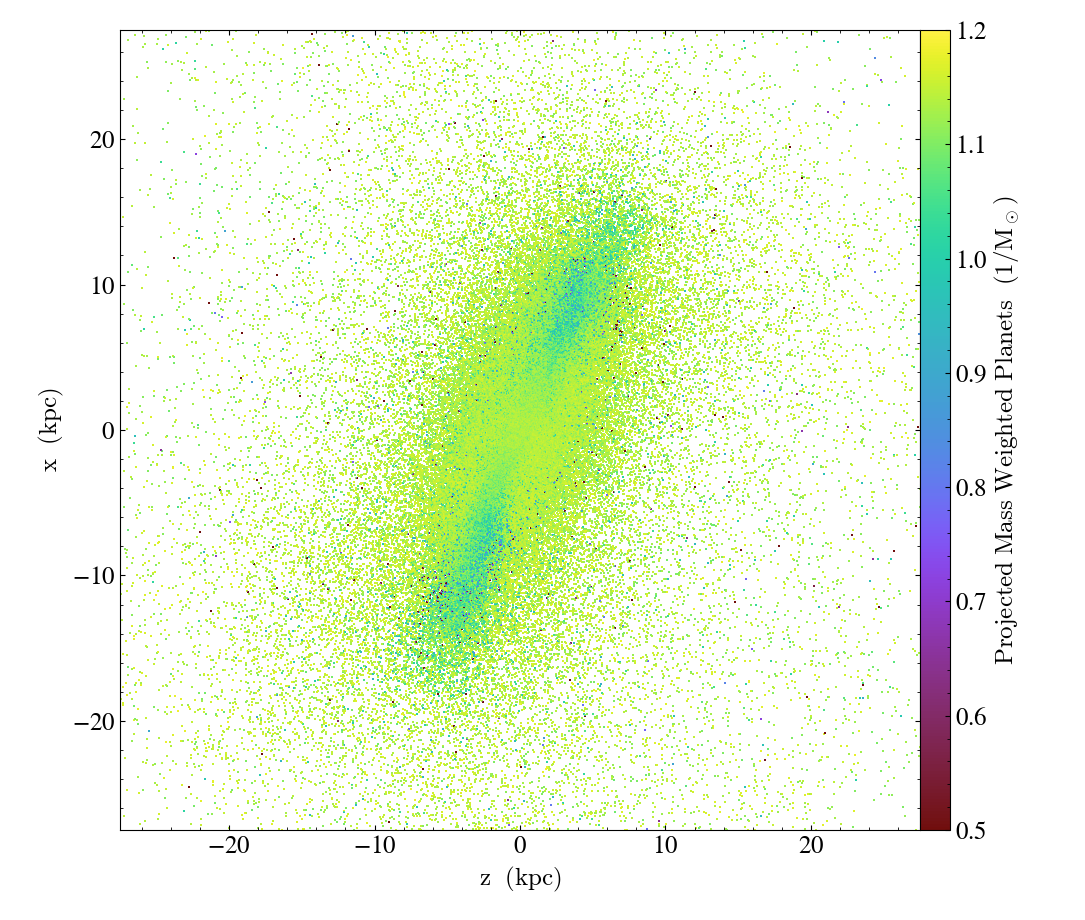
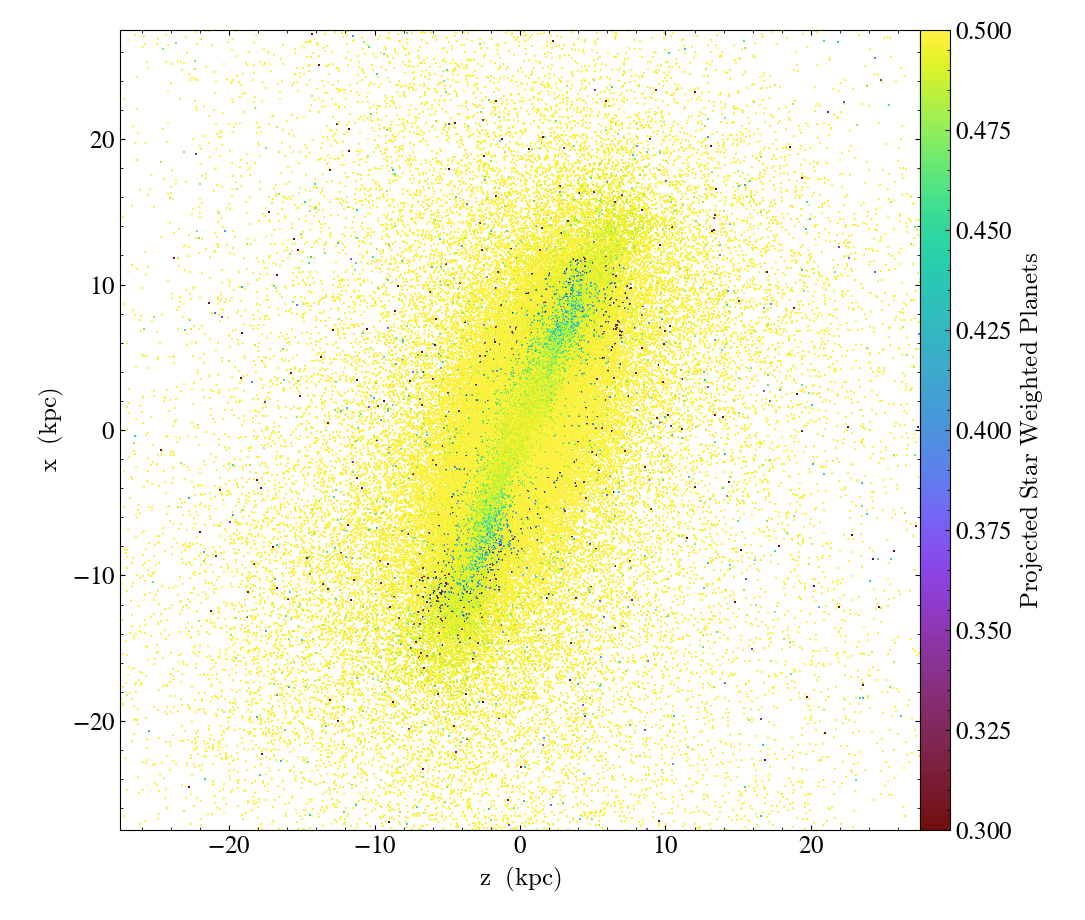

In [51]:
plot = yt.ParticleProjectionPlot(
    ds= rotated_data,
    fields=[("io", "mass_weighted_planets"), ("io", "star_weighted_planets")],
    axis='y',
    width=(55,"kpc"),
    weight_field=("io","particle_ones"),
    deposition="cic"
)

plot.set_log(("io", "star_weighted_planets"), False)
plot.set_log(("io", "mass_weighted_planets"), False)

plot.set_zlim(("io", "star_weighted_planets"), zmin=(0.3, ""), zmax=(0.5, ""))
plot.set_zlim(("io", "mass_weighted_planets"), zmin=(0.5, "1/Msun"), zmax=(1.2, "1/Msun"))

plot.show()

## Profiles


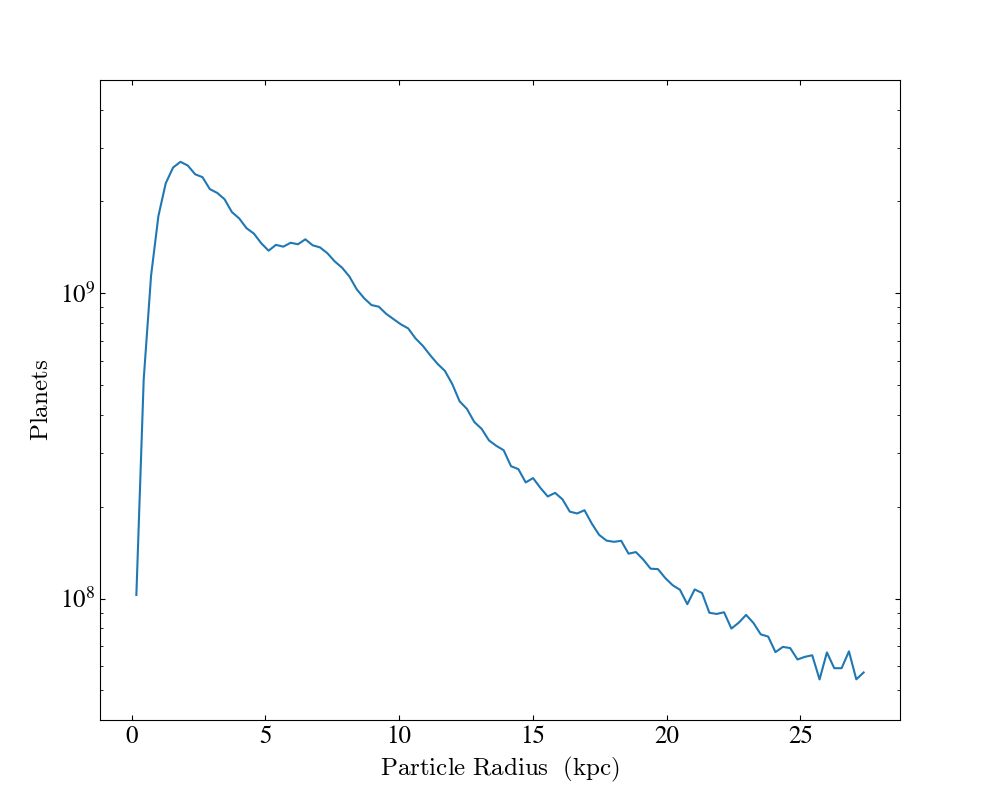

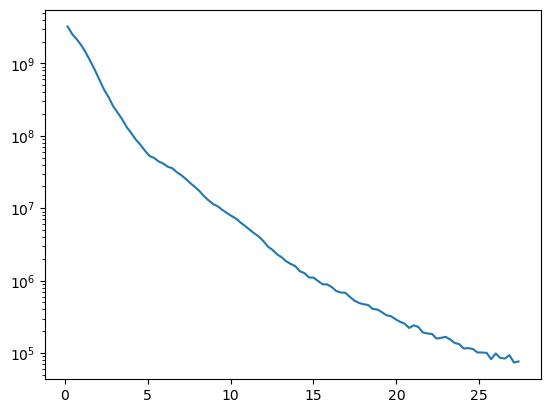

In [ ]:
# planet profile
planet_profile = yt.create_profile(
    data_source=mw.sphere(radius=ds.quan(27.5,'kpc')),
    bin_fields=[("stars", "particle_radius")],
    fields=[("stars", "planets")],
    n_bins=100,
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=None,
)

plot = yt.ProfilePlot.from_profiles(planet_profile)
plot.set_ylim(("stars","planets"),ymin=4e7,ymax=5e9)
plot.show()

plt.semilogy(planet_profile.x, planet_profile['stars','planets']/planet_profile.x**2)
#plt.ylim(1e4,1e9)


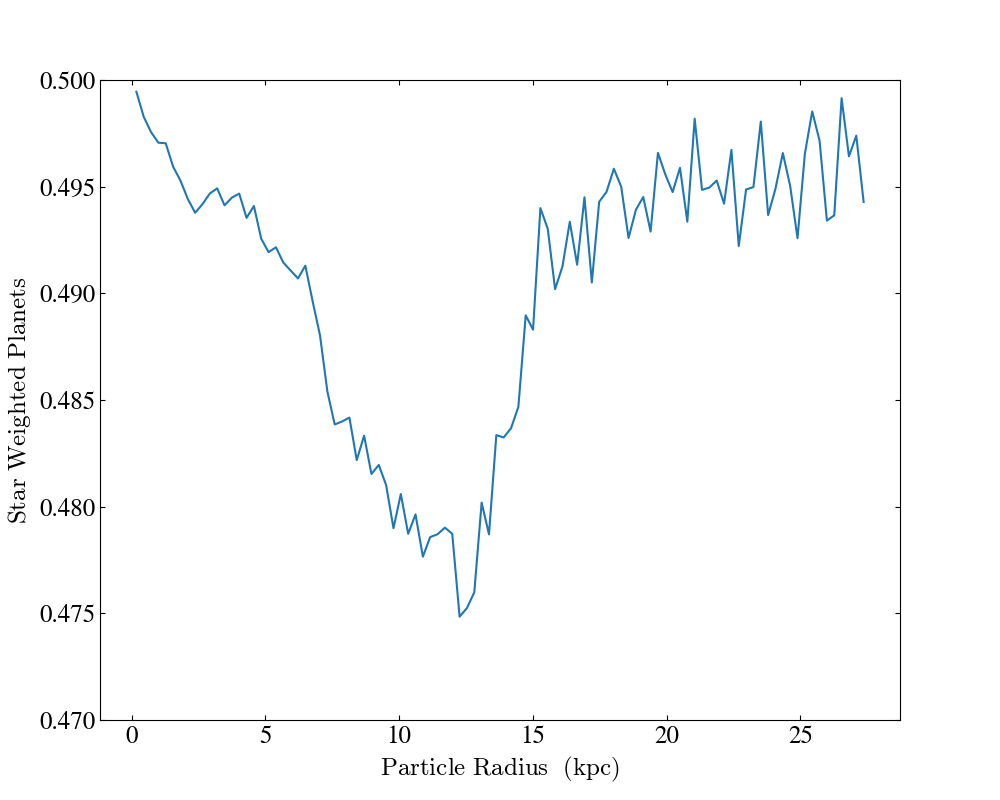

In [37]:
# planet profile
planet_profile = yt.create_profile(
    data_source=mw.sphere(radius=ds.quan(27.5,'kpc')),
    bin_fields=[("stars", "particle_radius")],
    fields=[("stars", "star_weighted_planets")],
    n_bins=100,
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=("stars", "particle_ones"),
)

plot = yt.ProfilePlot.from_profiles(planet_profile)
plot.set_ylim(("stars","star_weighted_planets"),ymin=0.47,ymax=0.5)
plot.set_log(('stars', 'star_weighted_planets'), False)
plot.show()

In [ ]:
# planet profile
planet_profile = yt.create_profile(
    data_source=mw.sphere(radius=ds.quan(27.5,'kpc')),
    bin_fields=[("stars", "particle_radius")],
    fields=[("stars", "mass_weighted_planets")],
    n_bins=100,
    units={('stars', 'particle_radius'): 'kpc'},
    logs={('stars', 'particle_radius'): False},
    weight_field=("stars", "particle_ones"),
)

plot = yt.ProfilePlot.from_profiles(planet_profile)
plot.set_ylim(("stars","mass_weighted_planets"),ymin=1.02,ymax=1.16)
plot.set_log(('stars', 'mass_weighted_planets'), False)
plot.show()

In [ ]:
np.argmax(planet_profile['stars','planets'])

In [ ]:
planet_profile.x[6]

In [ ]:
plt.plot(planet_profile.x, planet_profile['stars','planets']/sum(planet_profile['stars','planets']))

In [ ]:
np.log10(planet_profile.x[1:]) - np.log10(planet_profile.x[:-1]

In [ ]:
v = mw.sphere()['stars','particle_radius'].to('kpc').value

In [ ]:
len(v[v<7])/len(v)

In [ ]:
np.argmax(planet_profile.x>10)

In [ ]:
(np.cumsum(planet_profile['stars','planets'])/sum(planet_profile['stars','planets']))[25]

In [ ]:
sum(planet_profile['stars','planets'])